In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

# df = pd.read_csv('Exercise2BusData.csv')
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


In [18]:
df.shape

(2179, 9)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           2179 non-null   object 
 1   Stop_id                2179 non-null   int64  
 2   Bus_id                 2179 non-null   int64  
 3   Line_id                2179 non-null   int64  
 4   Arrival_delay          2179 non-null   int64  
 5   Dwell_time             2179 non-null   int64  
 6   Scheduled_travel_time  2179 non-null   int64  
 7   Upstream_stop_delay    2179 non-null   int64  
 8   Recurrent_delay        2179 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 153.3+ KB


In [20]:
df = df.iloc[:1000]

In [21]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

<Axes: xlabel='Arrival_delay', ylabel='Count'>

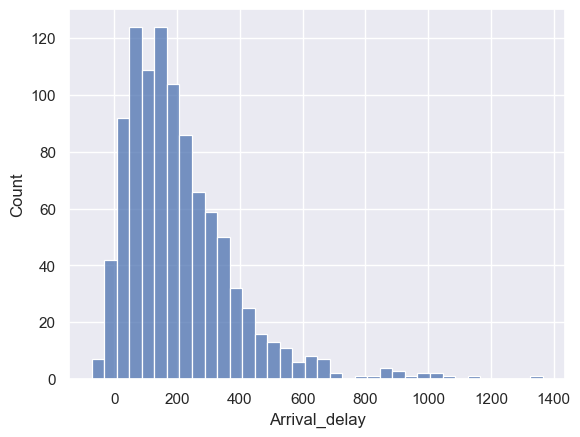

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df['Arrival_delay'])

In [23]:
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

Arrival_delay            1.000000
Upstream_stop_delay      0.993908
Dwell_time               0.222777
Recurrent_delay          0.161830
Scheduled_travel_time    0.117362
Name: Arrival_delay, dtype: float64

C:\Users\khafi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


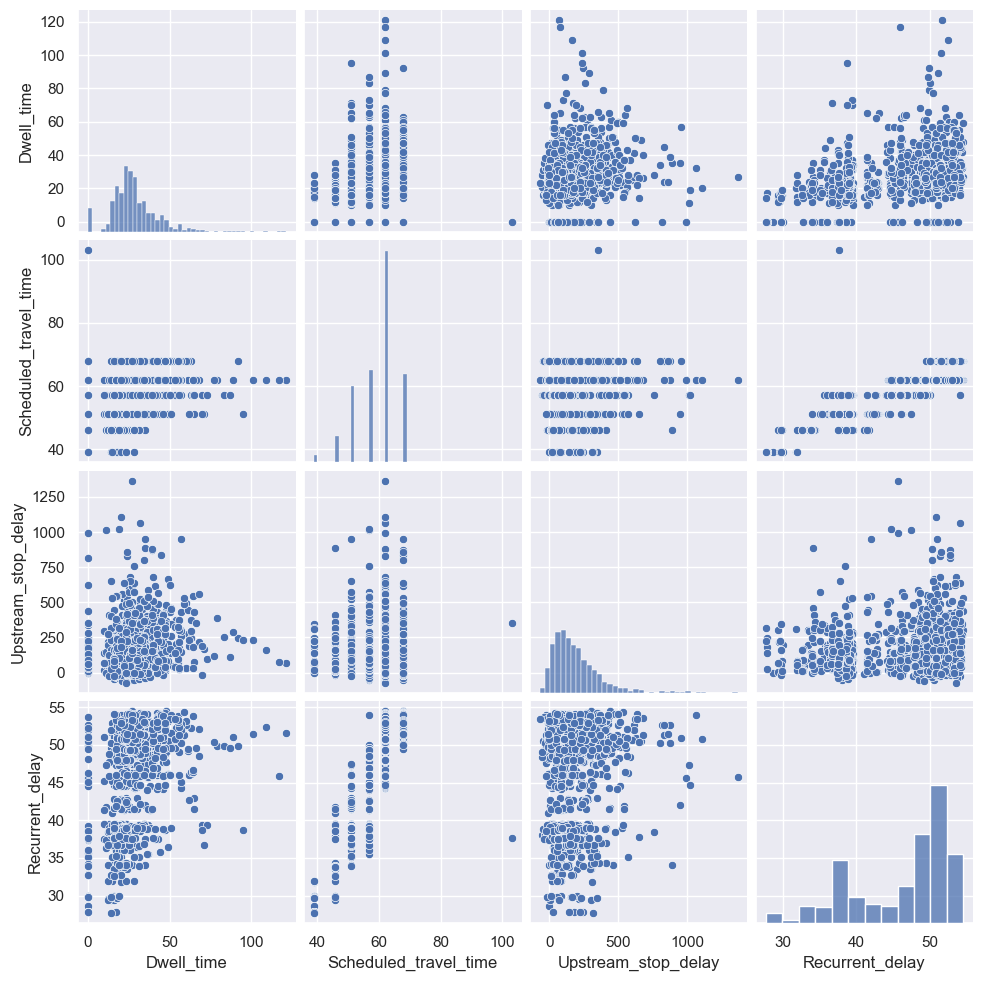

In [24]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

sns.pairplot(x)

## XGBoost

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

# Preprocessing: Using the first 1000 rows and dropping specific columns
df = df.iloc[:1000]
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Define features and target
X = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

# Normalize the feature data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Define a parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
}

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xg_reg,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1.5; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1.

In [40]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 11.368927918672561
Mean Squared Error: 240.98599117398058
R-squared: 0.9903081123541372


In [41]:
print("Best Parameters:", best_params)

Best Parameters: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1.5}


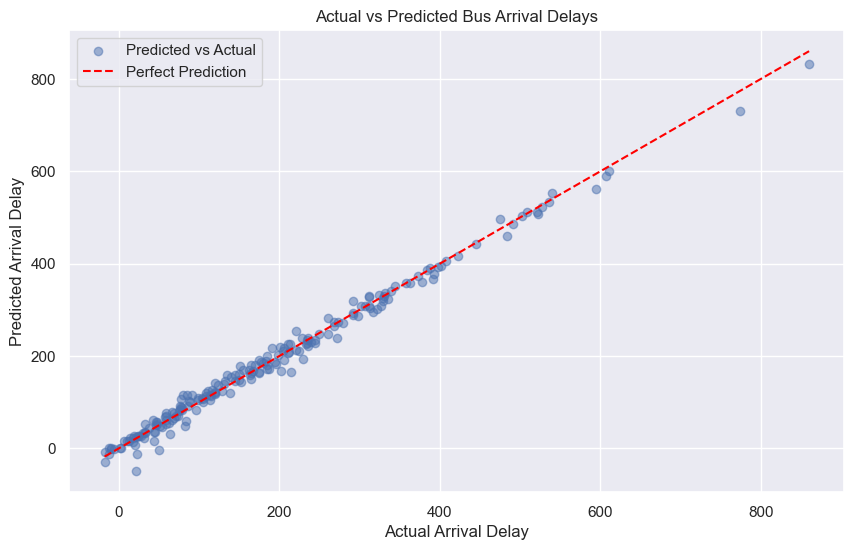

In [42]:
# Scatter plot: Actual vs. Predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b', label='Predicted vs Actual')

# Diagonal line representing perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Arrival Delay")
plt.ylabel("Predicted Arrival Delay")
plt.title("Actual vs Predicted Bus Arrival Delays")
plt.legend()

# Display the plot
plt.show()